[1] "(168.33961,171.66039)"

[1] "(168.01578,171.98422)"

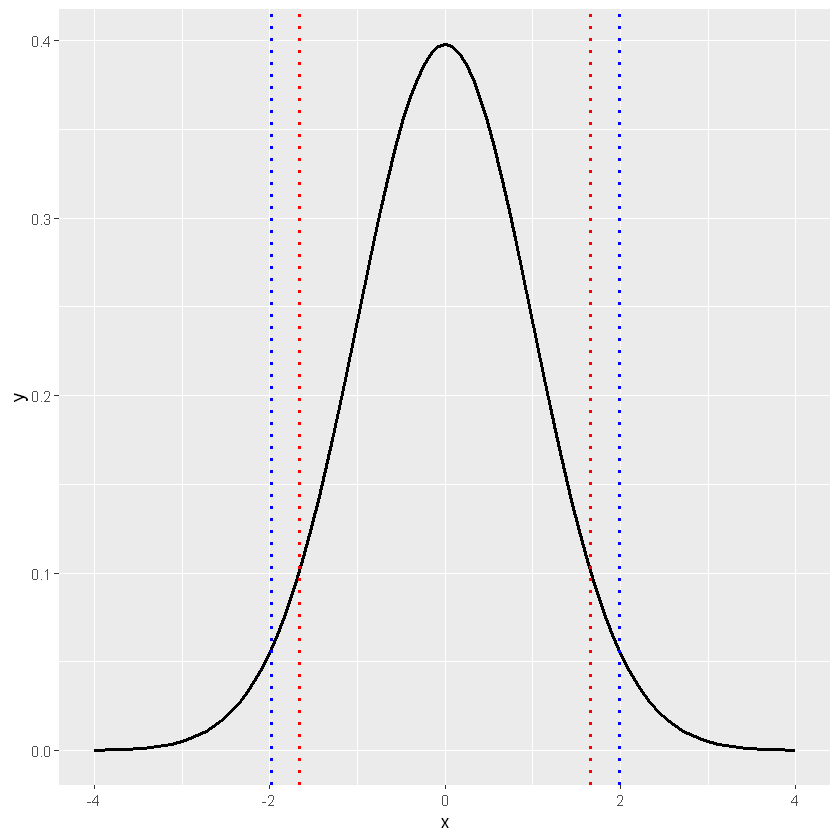

In [88]:
# 8. 어떤 집단에서 100명을 무작위로 추출한 결과, 키의 표본평균은 170Cm 이고 표준편차가 10cm 로 나타났다.
# 이 집단의 키가 정규분포를 따른다고 할 때,

n <- 100; x_mean <- 170; x_standard <- 10;

# (1) 키의 모평균에 대한 90% 신뢰구간을 구하시오.
min90 <- x_mean + (qt(p = 0.10/2, df= n - 1, lower.tail = TRUE) * x_standard / sqrt(n))
max90 <- x_mean + (qt(p = 0.10/2, df= n - 1, lower.tail = FALSE) * x_standard / sqrt(n))
sprintf("%s%.5f%s%.5f%s",'(' ,min90 ,',' ,max90 ,')')

# (2) 키의 모평균에 대한 95% 신뢰구간을 구하시오.
min95 <- x_mean + (qt(p = 0.05/2, df= n - 1, lower.tail = TRUE) * x_standard / sqrt(n))
max95 <- x_mean + (qt(p = 0.05/2, df= n - 1, lower.tail = FALSE) * x_standard / sqrt(n))
sprintf("%s%.5f%s%.5f%s",'(' ,min95 ,',' ,max95 ,')')

library(ggplot2)
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + 
    stat_function(fun = dt, args = list(df = n - 1), size = 1) +
    geom_vline(xintercept = min90 - x_mean, linetype = 'dotted', color='red', size = 1) + 
    geom_vline(xintercept = max90 - x_mean, linetype = 'dotted', color='red', size = 1) + 
    geom_vline(xintercept = min95 - x_mean, linetype = 'dotted', color='blue', size = 1) + 
    geom_vline(xintercept = max95 - x_mean, linetype = 'dotted', color='blue', size = 1)

[1] 57.36667

[1] "(-9.11393,-0.88607)"

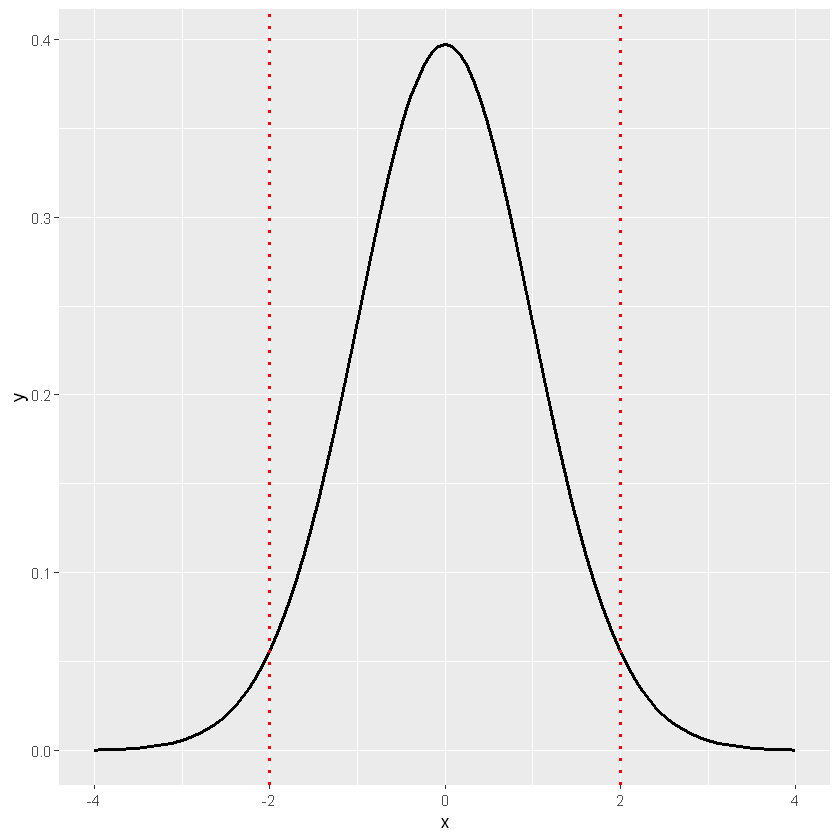

In [105]:
# 12. 정규 분포를 따르는 두개의 모집단의 평균을 비교하기 위해 크기가 30, 40 인 표본을 
# 각 모집단으로부터 랜덤 추출하여 다음과 같은 결과를 얻었다고 하자.

n <- 30; X_mean <- 240; S_X_sq <- 19;
m <- 25; Y_mean <- 245; S_Y_sq <- 20;

# (1) 두 모집단의 분산이 같다고 할 때, 공통된 분산을 추정하시오.

S_P_sq <- (((n - 1) * S_X_sq) + ((m - 1) * S_Y_sq)) / n + m - 2
round(S_P_sq, 5)

# (2) (1) 의 결과를 이용하여 두 모평균의 차이에 대해 신뢰 수준이 95% 인 신뢰구간을 구하시오.

CI_L <- (X_mean - Y_mean) +
(
    qt(p = 0.025, df= n + m - 2, lower.tail = TRUE) * sqrt(S_P_sq) * sqrt(1/n + 1/m)
)

CI_R <- (X_mean - Y_mean) +
(
    qt(p = 0.025, df= n + m - 2, lower.tail = FALSE) * sqrt(S_P_sq) * sqrt(1/n + 1/m)
)

sprintf("%s%.5f%s%.5f%s",'(' ,CI_L ,',' ,CI_R ,')')

# T ~ t(n) 일때, P[T > T_α(n)] = α 를 만족하는 t_α(n)의 값을 표시.
# qt(p = 0.05, df = 1, lower.tail = FALSE)

library(ggplot2)
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + 
    stat_function(fun = dt, args = list(df = n + m - 2), size = 1) + 
    geom_vline(xintercept = qt(p = 0.05/2, df= n + m - 2, lower.tail = TRUE)
               , linetype = 'dotted', color='red', size = 1) +
    geom_vline(xintercept = qt(p = 0.05/2, df= n + m - 2, lower.tail = FALSE)
               , linetype = 'dotted', color='red', size = 1)

[1] 16.66426

[1] 2.365586

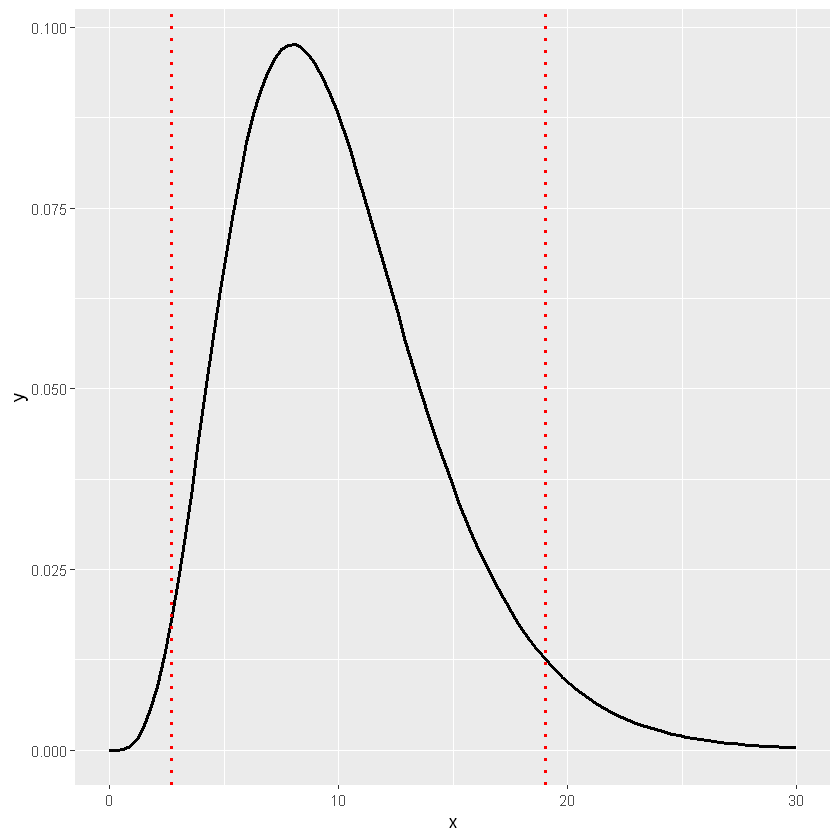

In [104]:
# 14. 어떤 제조라인에서 랜덤 추출한 제품 10개의 중량의 분산이 4.5 였다.
# 제품의 중량은 정규분포를 따른다고 할 때, 모분산 에 대한 신뢰수준이 95%인 신뢰 구간을 구하시오.

n <- 10; s_sq <- 4.5

(s_sq * 10) / qchisq(p = 0.025, df = n - 1, lower.tail = TRUE)
(s_sq * 10) / qchisq(p = 0.025, df = n - 1, lower.tail = FALSE)

ggplot(data.frame(x = c(0,30)), aes(x = x)) +
    stat_function(fun = dchisq, args = list(df = n), size = 1) +
    geom_vline(xintercept = qchisq(p = 0.05/2, df = n - 1, lower.tail = TRUE)
               , linetype = 'dotted', color='red', size = 1) +
    geom_vline(xintercept = qchisq(p = 0.05/2, df = n - 1, lower.tail = FALSE)
               , linetype = 'dotted', color='red', size = 1)